In [2]:
import pandas as pd
import numpy as np

insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [109]:
## Task 1: Clean up the data
## 1.1: Check for missing values
# Standardize categories in region
## Standardize sex to just two categories
## Standadize charges data type ,all values should be float

insurance_data_without_na = insurance_data.dropna().copy()

insurance_data_without_na['region'] = insurance_data_without_na['region'].str.lower()

FEMALE = 'female'
MALE = 'male'

sex_map = {'F': FEMALE , 'woman': FEMALE , 'man': MALE , 'M': MALE}
insurance_data_without_na['sex'] = insurance_data_without_na['sex'].replace(sex_map)

insurance_data_without_na= insurance_data_without_na[insurance_data_without_na['age'] >=0].copy()
insurance_data_without_na= insurance_data_without_na[insurance_data_without_na['children']>=0].copy()

insurance_data_without_na['smoker']= insurance_data_without_na['smoker'] == 'yes'
insurance_data_without_na['charges'] = insurance_data_without_na['charges'].str.replace('$', '').str.replace(',', '').astype(float).abs()

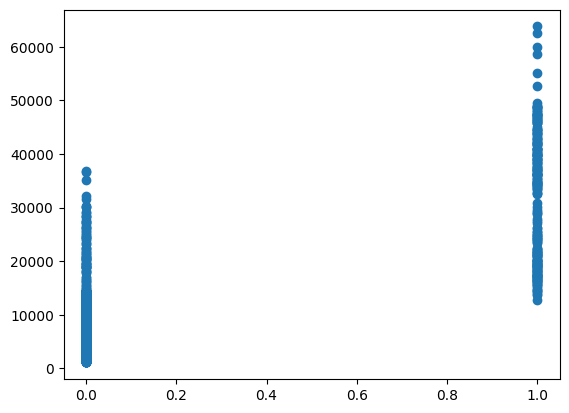

In [116]:
##TASK 2 : Scatterplot between variables and charges
import matplotlib.pyplot as plt

df = insurance_data_without_na.copy()
plt.scatter(df['smoker'], df['charges'])

In [139]:
#Task 3 Prepare Data for model fitting (linear regression model)

##dummy encoding for region
df_new = df.copy()
df_new = pd.get_dummies(df,columns=['region'], drop_first=True)
df_new[['region_northwest', 'region_southeast', 'region_southwest']] = df_new[['region_northwest', 'region_southeast', 'region_southwest']].astype(int)
df_new['smoker'] = df_new['smoker'].astype(int)
df_new['isMale'] = (df_new['sex'] == 'male' ) .astype(int)
df_new = df_new.drop(columns=['sex'])
df_new.head()

,age,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,isMale
0,19.0,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,33.770,1.0,0,1725.55230,0,1,0,1
2,28.0,33.000,3.0,0,4449.46200,0,1,0,1
3,33.0,22.705,0.0,0,21984.47061,1,0,0,1
4,32.0,28.880,0.0,0,3866.85520,1,0,0,1


In [143]:
##Task 4: Fit a linear regression model to our data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_new.drop(columns=['charges'])
y = df_new['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

r2

0.7678309153181793